# Votações de cada parlamentar

In [15]:
import pandas as pd

[2018, 2019, 2020, 2021]

total = 0

for year in [2018, 2019, 2020, 2021]:

    df = pd.read_csv(f"votacoesVotos\\votacoesVotos-{year}.csv", sep=";")
    num_unique = df["idVotacao"].nunique()

    total += num_unique

    print(f"[{year}] Número de diferentes idVotacao: {num_unique}")

print(f"Número total de diferentes idVotacao: {total}")


[2018] Número de diferentes idVotacao: 142
[2019] Número de diferentes idVotacao: 333
[2020] Número de diferentes idVotacao: 310
[2021] Número de diferentes idVotacao: 369
Número total de diferentes idVotacao: 1154


# Desenhar Grafo

Quantidade de votos SIM: 174054
Quantidade de votos NÃO: 143419
Quantidade de votos OUTROS: 4764


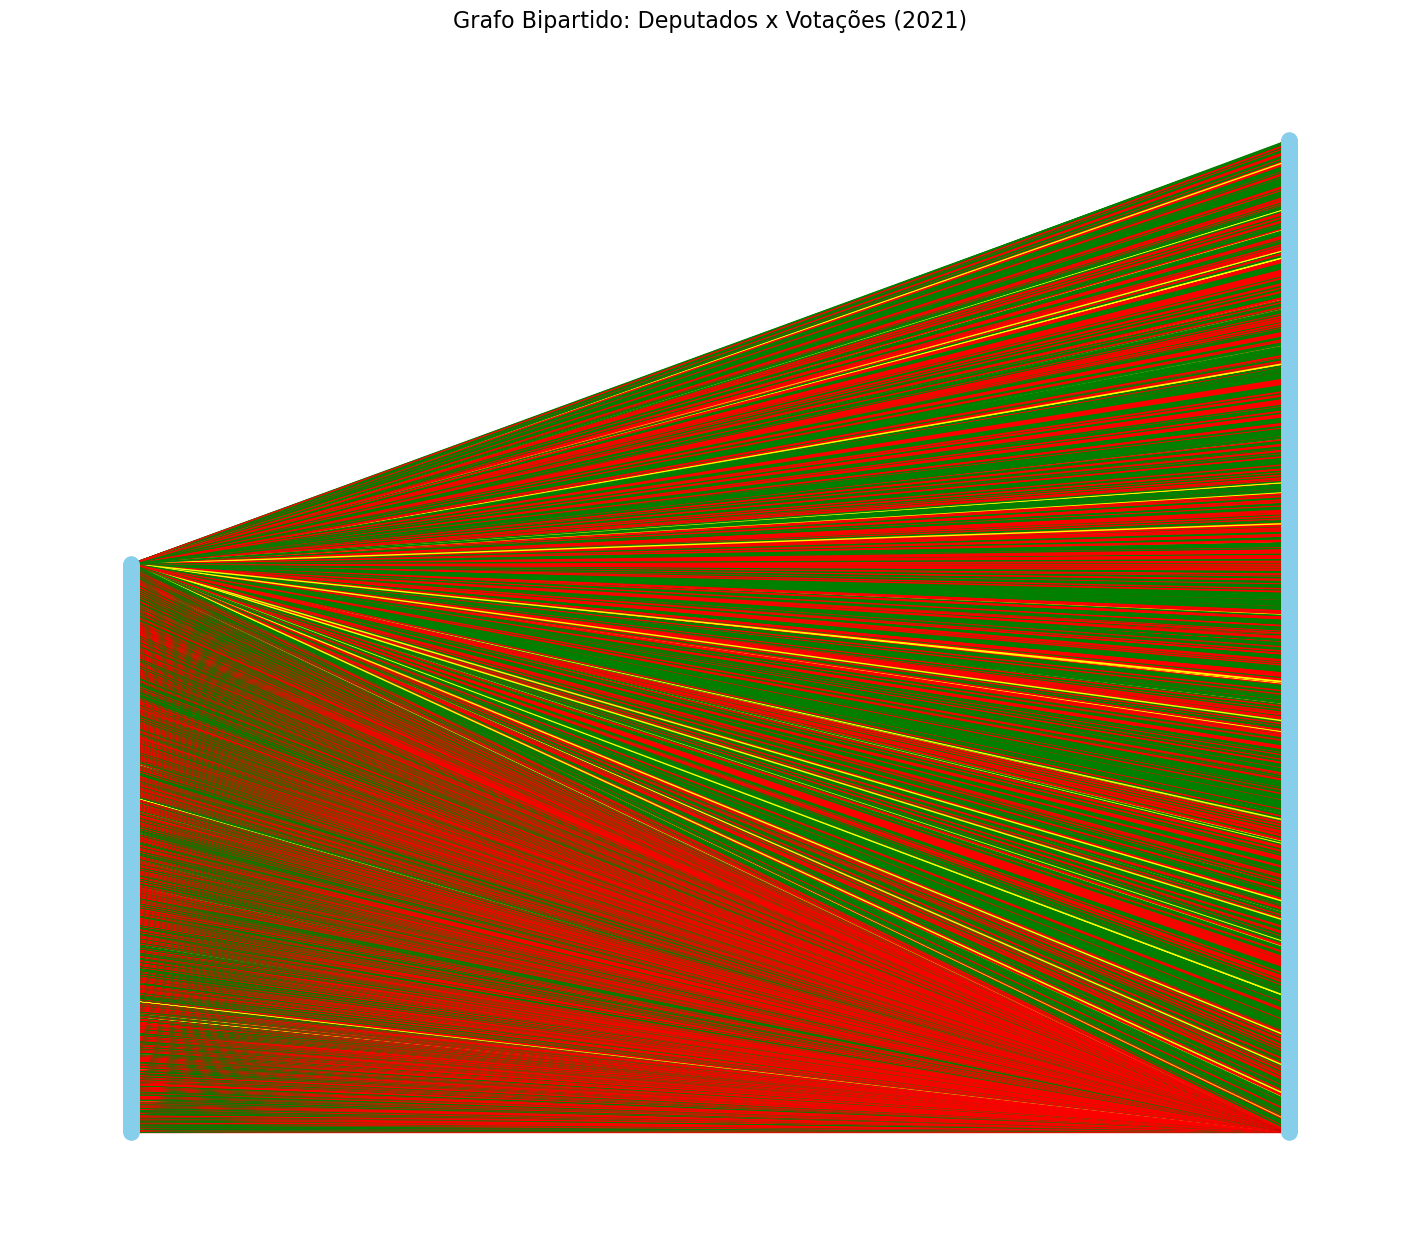

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("votacoesVotos\\votacoesVotos-2021.csv", sep=";")

# Contagem de votos
contagem = df["voto"].str.strip().str.lower().value_counts()
qtd_sim = contagem.get("sim", 0)
qtd_nao = contagem.get("não", 0)
qtd_outros = len(df) - (qtd_sim + qtd_nao)

print(f"Quantidade de votos SIM: {qtd_sim}")
print(f"Quantidade de votos NÃO: {qtd_nao}")
print(f"Quantidade de votos OUTROS: {qtd_outros}")

# Criar grafo bipartido
G = nx.Graph()

# Conjuntos bipartidos
deputados = set(df["deputado_nome"].dropna())
votacoes = set(df["idVotacao"].dropna())

# Adicionar nós com atributo bipartido
G.add_nodes_from(deputados, bipartite=0)
G.add_nodes_from(votacoes, bipartite=1)

# Adicionar arestas com cor
for _, row in df.iterrows():
    deputado = row["deputado_nome"]
    votacao = row["idVotacao"]
    voto = str(row["voto"]).strip().lower() if pd.notna(row["voto"]) else "outro"

    if voto == "não":
        cor = "red"
    elif voto == "sim":
        cor = "green"
    else:
        cor = "yellow"

    G.add_edge(deputado, votacao, color=cor)

# Pegar cores das arestas
cores = [G[u][v]['color'] for u, v in G.edges()]

# Layout bipartido com espaçamento maior
espacamento = 3
pos = {}
pos.update((node, (0, i * espacamento)) for i, node in enumerate(deputados))  # esquerda
pos.update((node, (10, i * espacamento)) for i, node in enumerate(votacoes))  # direita

# Desenhar grafo sem labels
plt.figure(figsize=(14, 12))
nx.draw(
    G, pos,
    with_labels=False,
    node_size=120,
    edge_color=cores,
    node_color="skyblue"
)
plt.title("Grafo Bipartido: Deputados x Votações (2021)", fontsize=16)
plt.show()


# Histograma de proposições

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Lista de anos
anos = [2018, 2019, 2020, 2021]

# Dicionário para armazenar todas as contagens de cada idVotacao
contagens = Counter()

for ano in anos:
    df = pd.read_csv(f"votacoesVotos/votacoesVotos-{ano}.csv", sep=";")
    
    # Conta quantas vezes cada idVotacao aparece nesse ano
    freq = df["idVotacao"].value_counts()
    
    # Atualiza o contador global
    contagens.update(freq.to_dict())


In [2]:
print("Contagem de idVotacao ao longo dos anos:")
for id_votacao, count in contagens.items():
    print(f"idVotacao {id_votacao}: {count} votos")

Contagem de idVotacao ao longo dos anos:
idVotacao 2160860-93: 441 votos
idVotacao 542102-156: 420 votos
idVotacao 2168064-19: 414 votos
idVotacao 2160860-65: 408 votos
idVotacao 2168064-15: 406 votos
idVotacao 2088280-114: 405 votos
idVotacao 2169397-9: 403 votos
idVotacao 2164234-52: 401 votos
idVotacao 2168064-12: 401 votos
idVotacao 2164596-9: 393 votos
idVotacao 2168064-9: 393 votos
idVotacao 2151922-66: 393 votos
idVotacao 2169217-6: 391 votos
idVotacao 2166260-19: 390 votos
idVotacao 2149372-22: 388 votos
idVotacao 2177451-131: 383 votos
idVotacao 2174273-7: 381 votos
idVotacao 2177451-126: 381 votos
idVotacao 2177451-123: 374 votos
idVotacao 2175857-4: 373 votos
idVotacao 2182065-64: 373 votos
idVotacao 2158425-38: 371 votos
idVotacao 2152544-73: 369 votos
idVotacao 2164234-47: 368 votos
idVotacao 2160860-52: 368 votos
idVotacao 542102-108: 368 votos
idVotacao 109150-238: 367 votos
idVotacao 2177451-129: 366 votos
idVotacao 2188690-32: 364 votos
idVotacao 2186805-6: 363 votos
i

In [4]:
import matplotlib.pyplot as plt

# Cria um histograma: eixo X = valores de repetição, eixo Y = quantos idVotacao têm esse valor
valores_repetidos = list(contagens.values())

plt.figure(figsize=(20, 12))  # figura bem grande

plt.hist(valores_repetidos,
         bins=range(1, max(valores_repetidos)+2),
         align="left",
         edgecolor="black")

plt.xlabel("Número de repetições do idVotacao", fontsize=18)
plt.ylabel("Quantidade de idVotacao com esse valor", fontsize=18)
plt.title("Distribuição de repetições dos idVotacao", fontsize=20)

# Definir ticks no eixo X de 10 em 10
plt.xticks(range(0, max(valores_repetidos)+1, 10), fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Salva em PDF
plt.savefig("histograma_idVotacao.pdf", format="pdf")

plt.close()
